<a href="https://colab.research.google.com/github/romanescobar/Challenge-Telecom-X/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [25]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
api_url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"


In [27]:
try:
    response = requests.get(api_url)
    response.raise_for_status()
    print("Solicitud a la API exitosa.")
except requests.exceptions.RequestException as e:
    print(f"Error al conectar con la API: {e}")
    exit()

Solicitud a la API exitosa.


In [28]:
data_json = response.json()
print(f"Datos JSON cargados. Tipo de dato: {type(data_json)}")

Datos JSON cargados. Tipo de dato: <class 'list'>


In [29]:
df = pd.DataFrame(data_json)
print("\nDataFrame creado exitosamente.")
print("Primeras 5 filas del DataFrame:")
print(df.head())
print("\nInformación del DataFrame:")
df.info()


DataFrame creado exitosamente.
Primeras 5 filas del DataFrame:
   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...  

#🔧 Transformación

In [30]:
print("--- Información general del DataFrame ---")
df.info()

--- Información general del DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [31]:
print("\n--- Tipos de datos de cada columna ---")
print(df.dtypes)


--- Tipos de datos de cada columna ---
customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object


In [32]:
print("--- DataFrame antes de desanidar ---")
df.info()
print(df.head(2))

print("\n--- Desanidando columna 'customer' ---")
# pd.json_normalize(df['customer']) es una opción, pero .apply(pd.Series) es más directo aquí
customer_data = df['customer'].apply(pd.Series)
df = pd.concat([df, customer_data], axis=1) # Unir con el DataFrame original
df.drop('customer', axis=1, inplace=True) # Eliminar la columna original

print("\n--- Desanidando columna 'phone' ---")
phone_data = df['phone'].apply(pd.Series)
df = pd.concat([df, phone_data], axis=1)
df.drop('phone', axis=1, inplace=True)

print("\n--- Desanidando columna 'internet' ---")
internet_data = df['internet'].apply(pd.Series)
df = pd.concat([df, internet_data], axis=1)
df.drop('internet', axis=1, inplace=True)

print("\n--- Desanidando columna 'account' ---")
account_data = df['account'].apply(pd.Series)
df = pd.concat([df, account_data], axis=1)
df.drop('account', axis=1, inplace=True)

print("\n--- DataFrame después de desanidar ---")
df.info()
print(df.head())

--- DataFrame antes de desanidar ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB
   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '... 

In [33]:
print("\n--- DataFrame antes de desanidar 'Charges' ---")
print(df[['PaymentMethod', 'Charges']].head())

if 'Charges' in df.columns and df['Charges'].apply(lambda x: isinstance(x, dict)).any():
    print("\n--- Desanidando columna 'Charges' ---")
    charges_data = df['Charges'].apply(pd.Series)
    charges_data.rename(columns={'Monthly': 'Charges.Monthly', 'Total': 'Charges.Total'}, inplace=True)
    df = pd.concat([df, charges_data], axis=1)
    df.drop('Charges', axis=1, inplace=True)
    print("Columna 'Charges' desanidada exitosamente.")
else:
    print("La columna 'Charges' no se encontró o no contiene diccionarios para desanidar.")

print("\n--- DataFrame después de desanidar 'Charges' ---")
df.info()
print(df.head())


--- DataFrame antes de desanidar 'Charges' ---
      PaymentMethod                                Charges
0      Mailed check    {'Monthly': 65.6, 'Total': '593.3'}
1      Mailed check    {'Monthly': 59.9, 'Total': '542.4'}
2  Electronic check   {'Monthly': 73.9, 'Total': '280.85'}
3  Electronic check  {'Monthly': 98.0, 'Total': '1237.85'}
4      Mailed check    {'Monthly': 83.9, 'Total': '267.4'}

--- Desanidando columna 'Charges' ---
Columna 'Charges' desanidada exitosamente.

--- DataFrame después de desanidar 'Charges' ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 no

In [34]:
print("\n--- Comprobación de valores ausentes (Nulos) ---")
missing_values = df.isnull().sum()
print("Número de valores nulos por columna:")
print(missing_values[missing_values > 0])

if missing_values.sum() == 0:
    print("\n¡No se detectaron valores nulos directamente con .isnull()!")
else:
    print(f"\nTotal de valores nulos en el DataFrame: {missing_values.sum()}")
    print("Las columnas listadas arriba contienen valores nulos.")


--- Comprobación de valores ausentes (Nulos) ---
Número de valores nulos por columna:
Series([], dtype: int64)

¡No se detectaron valores nulos directamente con .isnull()!


In [35]:
print("\n--- Comprobación de Duplicados ---")
total_duplicates = df.duplicated().sum()
print(f"Número de filas completamente duplicadas: {total_duplicates}")

if total_duplicates > 0:
    print("Considera eliminar filas duplicadas si no son relevantes (e.g., `df.drop_duplicates(inplace=True)`).")
else:
    print("No se encontraron filas completamente duplicadas.")

customer_id_duplicates = df.duplicated(subset=['customerID']).sum()
print(f"Número de IDs de cliente duplicados: {customer_id_duplicates}")

if customer_id_duplicates > 0:
    print("¡Advertencia! Hay IDs de cliente duplicados. Esto podría indicar problemas en la fuente de datos o requerir un manejo especial.")
else:
    print("No se encontraron IDs de cliente duplicados.")


--- Comprobación de Duplicados ---
Número de filas completamente duplicadas: 0
No se encontraron filas completamente duplicadas.
Número de IDs de cliente duplicados: 0
No se encontraron IDs de cliente duplicados.


In [36]:
print("\n--- Verificación y Corrección de Tipos de Datos y Errores de Formato ---")

print("\nProcesando 'Charges.Total'...")

df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')

missing_charges_total_after_coerce = df['Charges.Total'].isnull().sum()

if missing_charges_total_after_coerce > 0:
    print(f"Se encontraron {missing_charges_total_after_coerce} valores no numéricos en 'Charges.Total' (originalmente cadenas/espacios) y se convirtieron a NaN.")
    print("Estos valores nulos deberán ser manejados en la fase de Transformación (imputar o eliminar).")
else:
    print("No se encontraron valores no numéricos en 'Charges.Total' que requirieran coerción a NaN.")

print(f"Tipo de dato final de 'Charges.Total': {df['Charges.Total'].dtype}")
print("\nProcesando 'SeniorCitizen'...")

if df['SeniorCitizen'].dtype == 'object':
    df['SeniorCitizen'] = pd.to_numeric(df['SeniorCitizen'], errors='coerce').astype('Int64')
    print(f"Tipo de dato de 'SeniorCitizen' ajustado a: {df['SeniorCitizen'].dtype}")
else:
    print(f"'SeniorCitizen' ya es de tipo {df['SeniorCitizen'].dtype}. No se requiere ajuste.")

print("\nProcesando 'tenure'...")

if df['tenure'].dtype == 'object':
    df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce').astype('Int64')
    print(f"Tipo de dato de 'tenure' ajustado a: {df['tenure'].dtype}")
else:
    print(f"'tenure' ya es de tipo {df['tenure'].dtype}. No se requiere ajuste.")

print("\nProcesando 'Charges.Monthly'...")

if df['Charges.Monthly'].dtype == 'object':
    df['Charges.Monthly'] = pd.to_numeric(df['Charges.Monthly'], errors='coerce')
    print(f"Tipo de dato de 'Charges.Monthly' ajustado a: {df['Charges.Monthly'].dtype}")
else:
    print(f"'Charges.Monthly' ya es de tipo {df['Charges.Monthly'].dtype}. No se requiere ajuste.")

print("\n--- Resumen de tipos de datos después de ajustes ---")
df.info()


--- Verificación y Corrección de Tipos de Datos y Errores de Formato ---

Procesando 'Charges.Total'...
Se encontraron 11 valores no numéricos en 'Charges.Total' (originalmente cadenas/espacios) y se convirtieron a NaN.
Estos valores nulos deberán ser manejados en la fase de Transformación (imputar o eliminar).
Tipo de dato final de 'Charges.Total': float64

Procesando 'SeniorCitizen'...
'SeniorCitizen' ya es de tipo int64. No se requiere ajuste.

Procesando 'tenure'...
'tenure' ya es de tipo int64. No se requiere ajuste.

Procesando 'Charges.Monthly'...
'Charges.Monthly' ya es de tipo float64. No se requiere ajuste.

--- Resumen de tipos de datos después de ajustes ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            72

In [37]:
print("\n--- Verificación de Inconsistencias en Categorías (Valores Únicos) ---")

categorical_cols = [
    'Churn', 'gender', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]

for col in categorical_cols:
    if col in df.columns and df[col].dtype == 'object':
        print(f"\nValores únicos para '{col}':")
        unique_values = df[col].astype(str).unique()
        print(unique_values)
        print(f"Conteo de valores para '{col}':")
        print(df[col].value_counts(dropna=False))
    elif col in df.columns:
        print(f"\nLa columna '{col}' ya no es de tipo 'object' (actual: {df[col].dtype}). Ignorando la verificación de categorías.")
    else:
        print(f"\nLa columna '{col}' no se encontró en el DataFrame.")


--- Verificación de Inconsistencias en Categorías (Valores Únicos) ---

Valores únicos para 'Churn':
['No' 'Yes' '']
Conteo de valores para 'Churn':
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64

Valores únicos para 'gender':
['Female' 'Male']
Conteo de valores para 'gender':
gender
Male      3675
Female    3592
Name: count, dtype: int64

Valores únicos para 'Partner':
['Yes' 'No']
Conteo de valores para 'Partner':
Partner
No     3749
Yes    3518
Name: count, dtype: int64

Valores únicos para 'Dependents':
['Yes' 'No']
Conteo de valores para 'Dependents':
Dependents
No     5086
Yes    2181
Name: count, dtype: int64

Valores únicos para 'PhoneService':
['Yes' 'No']
Conteo de valores para 'PhoneService':
PhoneService
Yes    6560
No      707
Name: count, dtype: int64

Valores únicos para 'MultipleLines':
['No' 'Yes' 'No phone service']
Conteo de valores para 'MultipleLines':
MultipleLines
No                  3495
Yes                 3065
No phone service     707
Nam

In [38]:
print("--- Manejo de Valores Ausentes/Vacíos ---")

print(f"Valores únicos de 'Churn' antes de la limpieza: {df['Churn'].unique()}")
df['Churn'].replace('', np.nan, inplace=True)
print(f"Valores únicos de 'Churn' después de reemplazar '': {df['Churn'].unique()}")

rows_to_drop = df[df['Churn'].isnull() | df['Charges.Total'].isnull()]
print(f"\nNúmero de filas a eliminar por NaN en 'Churn' o 'Charges.Total': {len(rows_to_drop)}")

if not rows_to_drop.empty:
    print("Ejemplo de filas que serán eliminadas:")
    print(rows_to_drop[['customerID', 'Churn', 'Charges.Total']].head())

initial_rows = df.shape[0]
df.dropna(subset=['Churn', 'Charges.Total'], inplace=True)
final_rows = df.shape[0]

print(f"\nFilas iniciales: {initial_rows}")
print(f"Filas después de la eliminación de NaN: {final_rows}")
print(f"Filas eliminadas: {initial_rows - final_rows}")

print("\nVerificación de NaNs después de la eliminación:")
print(df[['Churn', 'Charges.Total']].isnull().sum())
print("\nDataFrame info después de la eliminación de nulos:")
df.info()

--- Manejo de Valores Ausentes/Vacíos ---
Valores únicos de 'Churn' antes de la limpieza: ['No' 'Yes' '']
Valores únicos de 'Churn' después de reemplazar '': ['No' 'Yes' nan]

Número de filas a eliminar por NaN en 'Churn' o 'Charges.Total': 235
Ejemplo de filas que serán eliminadas:
     customerID Churn  Charges.Total
30   0047-ZHDTW   NaN         929.30
75   0120-YZLQA   NaN        1355.10
96   0154-QYHJU   NaN        1696.20
98   0162-RZGMZ   NaN         287.85
175  0274-VVQOQ   NaN        6792.45

Filas iniciales: 7267
Filas después de la eliminación de NaN: 7032
Filas eliminadas: 235

Verificación de NaNs después de la eliminación:
Churn            0
Charges.Total    0
dtype: int64

DataFrame info después de la eliminación de nulos:
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Chur

/tmp/ipython-input-38-1410465903.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Churn'].replace('', np.nan, inplace=True)


In [39]:
print("\n--- Unificación de Categorías de Servicio ---")

print(f"Valores únicos de 'MultipleLines' antes: {df['MultipleLines'].unique()}")
df['MultipleLines'].replace('No phone service', 'No', inplace=True)
print(f"Valores únicos de 'MultipleLines' después: {df['MultipleLines'].unique()}")

internet_service_cols = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

for col in internet_service_cols:
    if 'No internet service' in df[col].unique():
        print(f"Valores únicos de '{col}' antes: {df[col].unique()}")
        df[col].replace('No internet service', 'No', inplace=True)
        print(f"Valores únicos de '{col}' después: {df[col].unique()}")
    else:
        print(f"'{col}' no contiene 'No internet service'. No se requiere unificación.")

print("\nUnificación de categorías de servicio completada.")


--- Unificación de Categorías de Servicio ---
Valores únicos de 'MultipleLines' antes: ['No' 'Yes' 'No phone service']
Valores únicos de 'MultipleLines' después: ['No' 'Yes']
Valores únicos de 'OnlineSecurity' antes: ['No' 'Yes' 'No internet service']
Valores únicos de 'OnlineSecurity' después: ['No' 'Yes']
Valores únicos de 'OnlineBackup' antes: ['Yes' 'No' 'No internet service']
Valores únicos de 'OnlineBackup' después: ['Yes' 'No']
Valores únicos de 'DeviceProtection' antes: ['No' 'Yes' 'No internet service']
Valores únicos de 'DeviceProtection' después: ['No' 'Yes']
Valores únicos de 'TechSupport' antes: ['Yes' 'No' 'No internet service']
Valores únicos de 'TechSupport' después: ['Yes' 'No']
Valores únicos de 'StreamingTV' antes: ['Yes' 'No' 'No internet service']
Valores únicos de 'StreamingTV' después: ['Yes' 'No']
Valores únicos de 'StreamingMovies' antes: ['No' 'Yes' 'No internet service']
Valores únicos de 'StreamingMovies' después: ['No' 'Yes']

Unificación de categorías de 

/tmp/ipython-input-39-744900140.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MultipleLines'].replace('No phone service', 'No', inplace=True)
/tmp/ipython-input-39-744900140.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

In [40]:
print("--- Creando la columna 'Cuentas_Diarias' ---")

if 'Charges.Monthly' in df.columns and pd.api.types.is_numeric_dtype(df['Charges.Monthly']):

    df['Cuentas_Diarias'] = df['Charges.Monthly'] / 30
    print("Columna 'Cuentas_Diarias' creada exitosamente.")
    print("Primeras 5 filas con la nueva columna:")
    print(df[['Charges.Monthly', 'Cuentas_Diarias']].head())

    print("\nInformación del DataFrame después de añadir 'Cuentas_Diarias':")
    df.info()
else:
    print("Error: La columna 'Charges.Monthly' no se encontró o no es numérica. Asegúrate de haber ejecutado los pasos previos correctamente.")

--- Creando la columna 'Cuentas_Diarias' ---
Columna 'Cuentas_Diarias' creada exitosamente.
Primeras 5 filas con la nueva columna:
   Charges.Monthly  Cuentas_Diarias
0             65.6         2.186667
1             59.9         1.996667
2             73.9         2.463333
3             98.0         3.266667
4             83.9         2.796667

Información del DataFrame después de añadir 'Cuentas_Diarias':
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Churn             7032 non-null   object 
 2   gender            7032 non-null   object 
 3   SeniorCitizen     7032 non-null   int64  
 4   Partner           7032 non-null   object 
 5   Dependents        7032 non-null   object 
 6   tenure            7032 non-null   int64  
 7   PhoneService      7032 non-null   object 
 8   MultipleLine

In [41]:
print("--- Codificación de Variables Categóricas ---")

df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})
print(f"Valores únicos de 'Churn' después de codificar: {df['Churn'].unique()}")

binary_yes_no_cols = [
    'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'PaperlessBilling'
]

for col in binary_yes_no_cols:
    df[col] = df[col].map({'No': 0, 'Yes': 1})
    print(f"Valores únicos de '{col}' después de codificar: {df[col].unique()}")

df['gender'] = df['gender'].map({'Female': 0, 'Male': 1})
print(f"Valores únicos de 'gender' después de codificar: {df['gender'].unique()}")

--- Codificación de Variables Categóricas ---
Valores únicos de 'Churn' después de codificar: [0 1]
Valores únicos de 'Partner' después de codificar: [1 0]
Valores únicos de 'Dependents' después de codificar: [1 0]
Valores únicos de 'PhoneService' después de codificar: [1 0]
Valores únicos de 'MultipleLines' después de codificar: [0 1]
Valores únicos de 'OnlineSecurity' después de codificar: [0 1]
Valores únicos de 'OnlineBackup' después de codificar: [1 0]
Valores únicos de 'DeviceProtection' después de codificar: [0 1]
Valores únicos de 'TechSupport' después de codificar: [1 0]
Valores únicos de 'StreamingTV' después de codificar: [1 0]
Valores únicos de 'StreamingMovies' después de codificar: [0 1]
Valores únicos de 'PaperlessBilling' después de codificar: [1 0]
Valores únicos de 'gender' después de codificar: [0 1]


In [42]:
print("\n--- Aplicando One-Hot Encoding a variables multiclase ---")

multi_class_cols = [
    'InternetService',
    'Contract',
    'PaymentMethod'
]

df = pd.get_dummies(df, columns=multi_class_cols, drop_first=True, dtype=int)

print("\n--- DataFrame después de One-Hot Encoding ---")
print("Primeras 5 filas del DataFrame después de codificar (verás las nuevas columnas):")
print(df.head())
print("\nInformación del DataFrame después de One-Hot Encoding:")
df.info()

print("\n--- Eliminando la columna 'customerID' ---")
if 'customerID' in df.columns:
    df.drop('customerID', axis=1, inplace=True)
    print("Columna 'customerID' eliminada.")
else:
    print("La columna 'customerID' no se encontró o ya fue eliminada.")

print("\n--- DataFrame final listo para análisis/modelado ---")
df.info()
print(df.head())


--- Aplicando One-Hot Encoding a variables multiclase ---

--- DataFrame después de One-Hot Encoding ---
Primeras 5 filas del DataFrame después de codificar (verás las nuevas columnas):
   customerID  Churn  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  0002-ORFBO      0       0              0        1           1       9   
1  0003-MKNFE      0       1              0        0           0       9   
2  0004-TLHLJ      1       1              0        0           0       4   
3  0011-IGKFF      1       1              1        1           0      13   
4  0013-EXCHZ      1       0              1        1           0       3   

   PhoneService  MultipleLines  OnlineSecurity  ...  Charges.Monthly  \
0             1              0               0  ...             65.6   
1             1              1               0  ...             59.9   
2             1              0               0  ...             73.9   
3             1              0               0  ...             98.0

#📊 Carga y análisis

In [43]:
print("--- Análisis Descriptivo de Columnas Numéricas ---")
print(df.describe())

print("\n--- Análisis Descriptivo de Columnas Categóricas (Distribución de Frecuencias) ---")

binary_cols = [
    'Churn', 'gender', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
    'SeniorCitizen'
]

print("\nDistribución de Frecuencias para 'Churn':")
print(df['Churn'].value_counts(normalize=True))

print("\nDistribución de Frecuencias para otras columnas binarias:")
for col in binary_cols:
    if col != 'Churn':
        print(f"\nColumna: {col}")
        print(df[col].value_counts(normalize=True))

print("\n--- Distribución de Frecuencias para Columnas One-Hot Encoded ---")

ohe_cols = [
    'InternetService_Fiber optic', 'InternetService_No',
    'Contract_One year', 'Contract_Two year',
    'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'
]

for col in ohe_cols:
    print(f"\nColumna: {col}")
    print(df[col].value_counts(normalize=True))

print("\nAnálisis Descriptivo Completado.")

--- Análisis Descriptivo de Columnas Numéricas ---
             Churn       gender  SeniorCitizen      Partner   Dependents  \
count  7032.000000  7032.000000    7032.000000  7032.000000  7032.000000   
mean      0.265785     0.504693       0.162400     0.482509     0.298493   
std       0.441782     0.500014       0.368844     0.499729     0.457629   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000     1.000000       0.000000     0.000000     0.000000   
75%       1.000000     1.000000       0.000000     1.000000     1.000000   
max       1.000000     1.000000       1.000000     1.000000     1.000000   

            tenure  PhoneService  MultipleLines  OnlineSecurity  OnlineBackup  \
count  7032.000000   7032.000000    7032.000000     7032.000000   7032.000000   
mean     32.421786      0.903299       0.421928        0.286547      0.344852   
std      24.545260   

--- Visualizando la Distribución de Evasión (Churn) ---
Proporción de Churn:
   Churn  Proportion
0      0    0.734215
1      1    0.265785


/tmp/ipython-input-44-3562428016.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Churn_Label', y='Proportion', data=churn_distribution, palette='viridis')


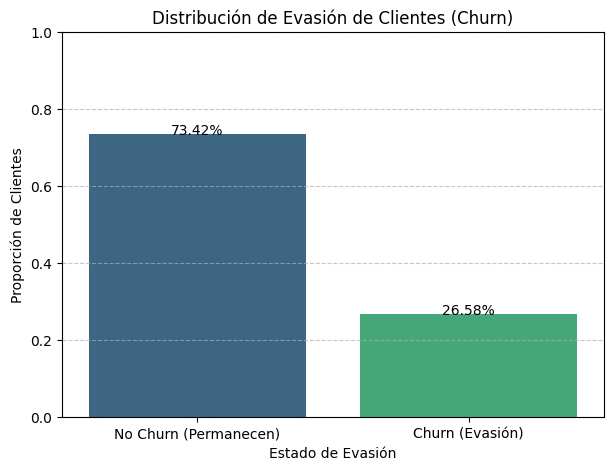


Visualización de la distribución de Churn completada.


In [44]:
print("--- Visualizando la Distribución de Evasión (Churn) ---")

churn_distribution = df['Churn'].value_counts(normalize=True).reset_index()
churn_distribution.columns = ['Churn', 'Proportion']
print("Proporción de Churn:")
print(churn_distribution)

churn_distribution['Churn_Label'] = churn_distribution['Churn'].map({0: 'No Churn (Permanecen)', 1: 'Churn (Evasión)'})

plt.figure(figsize=(7, 5))
sns.barplot(x='Churn_Label', y='Proportion', data=churn_distribution, palette='viridis')

for index, row in churn_distribution.iterrows():
    plt.text(row.name, row.Proportion, f'{row.Proportion:.2%}', color='black', ha="center")

plt.title('Distribución de Evasión de Clientes (Churn)')
plt.xlabel('Estado de Evasión')
plt.ylabel('Proporción de Clientes')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("\nVisualización de la distribución de Churn completada.")

--- Análisis de Evasión (Churn) por Variables Categóricas ---


/tmp/ipython-input-45-170759812.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='Churn', data=churn_rate, palette='coolwarm')
/tmp/ipython-input-45-170759812.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='Churn', data=churn_rate, palette='coolwarm')
/tmp/ipython-input-45-170759812.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='Churn', data=churn_rate, palette='coolwarm')
/tmp/ipython-input-45-170759812.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and

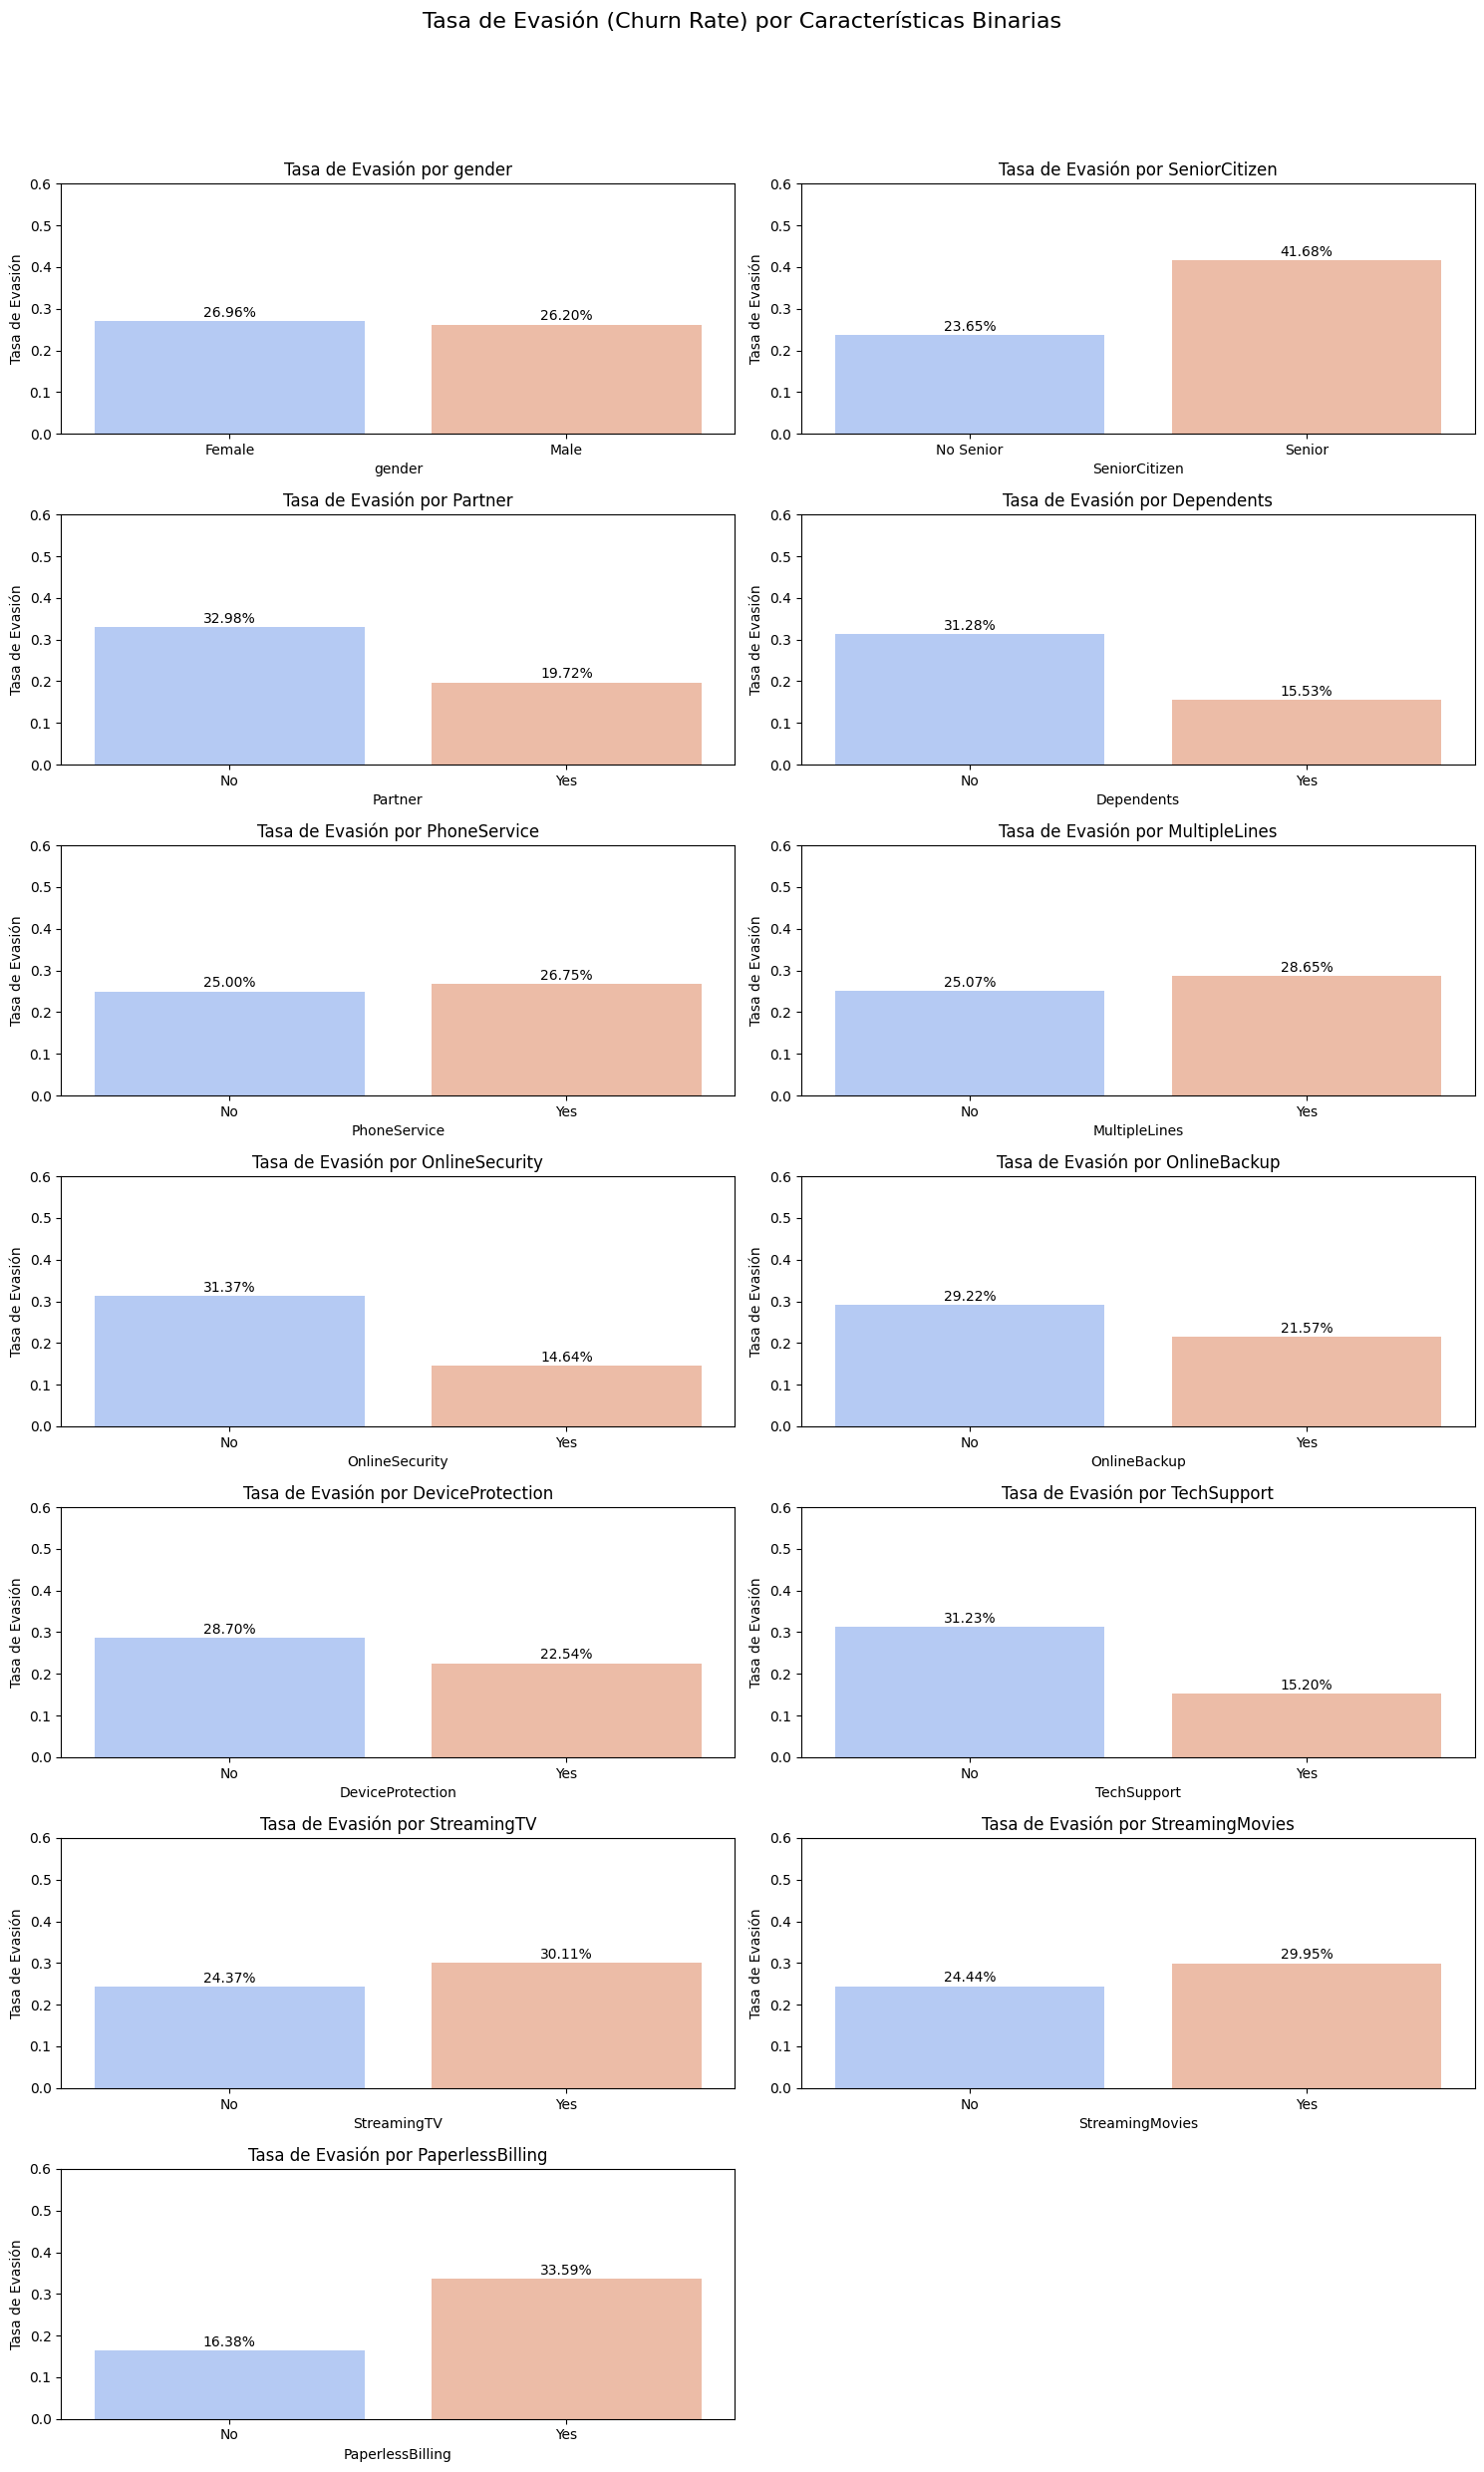


Visualización de evasión por variables binarias completada.

--- Tasa de Evasión por Tipo de Servicio de Internet ---


/tmp/ipython-input-45-170759812.py:45: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['InternetService_Fiber optic'] == 0][df['InternetService_No'] == 0]['Churn'].mean(),
/tmp/ipython-input-45-170759812.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='InternetService', y='Churn_Rate', data=df_internet_churn, palette='viridis')


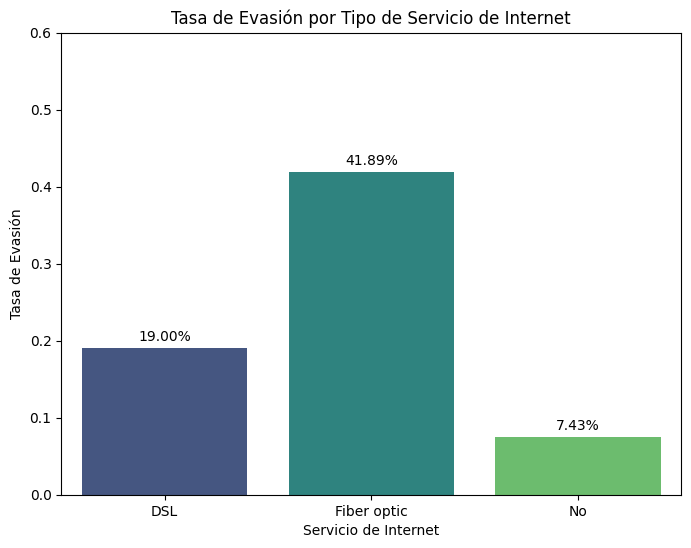


--- Tasa de Evasión por Tipo de Contrato ---


/tmp/ipython-input-45-170759812.py:67: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['Contract_One year'] == 0][df['Contract_Two year'] == 0]['Churn'].mean(),
/tmp/ipython-input-45-170759812.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Contract', y='Churn_Rate', data=df_contract_churn, palette='plasma')


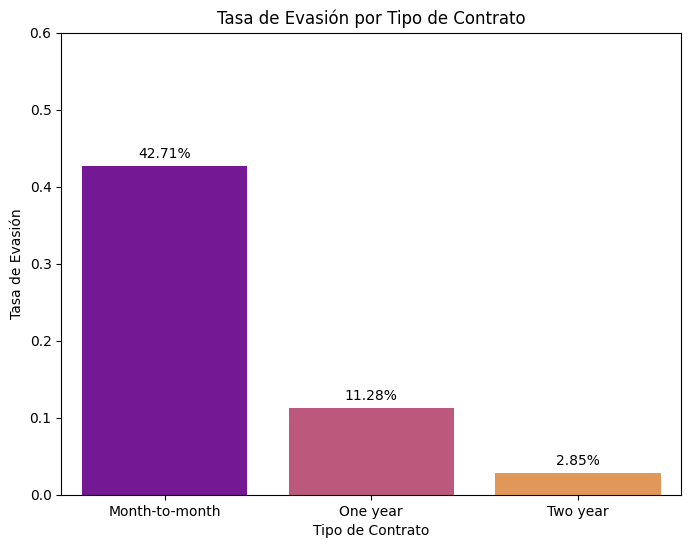


--- Tasa de Evasión por Método de Pago ---


/tmp/ipython-input-45-170759812.py:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PaymentMethod', y='Churn_Rate', data=df_payment_churn, palette='cool')


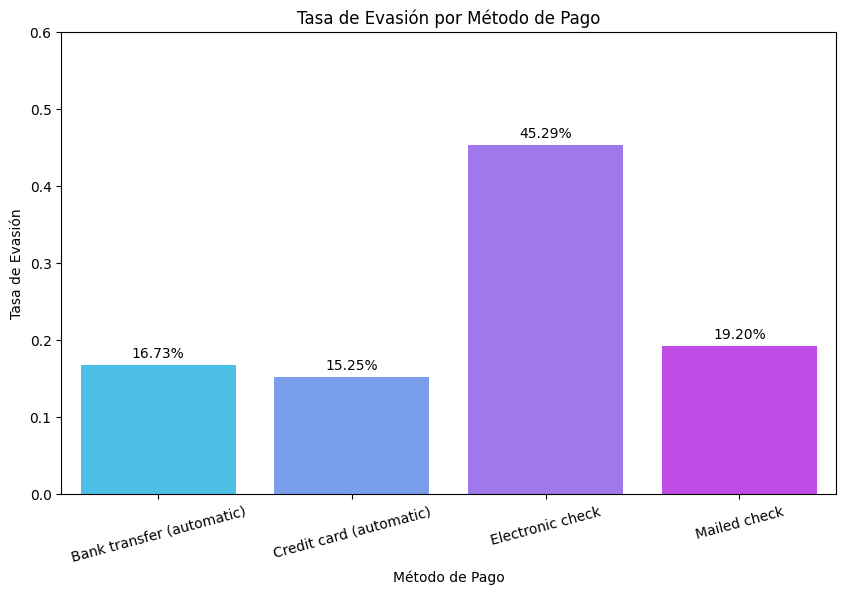


Análisis de evasión por variables categóricas completado.


In [45]:
print("--- Análisis de Evasión (Churn) por Variables Categóricas ---")

binary_features = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling'
]

gender_map = {0: 'Female', 1: 'Male'}
senior_map = {0: 'No Senior', 1: 'Senior'}
yes_no_map = {0: 'No', 1: 'Yes'}

plt.figure(figsize=(15, 25))
plt.suptitle('Tasa de Evasión (Churn Rate) por Características Binarias', y=1.02, fontsize=16)

for i, feature in enumerate(binary_features):
    plt.subplot(7, 2, i + 1)

    churn_rate = df.groupby(feature)['Churn'].mean().reset_index()

    if feature == 'gender':
        churn_rate[feature] = churn_rate[feature].map(gender_map)
    elif feature == 'SeniorCitizen':
        churn_rate[feature] = churn_rate[feature].map(senior_map)
    else:
        churn_rate[feature] = churn_rate[feature].map(yes_no_map)

    sns.barplot(x=feature, y='Churn', data=churn_rate, palette='coolwarm')
    plt.title(f'Tasa de Evasión por {feature}')
    plt.xlabel(feature)
    plt.ylabel('Tasa de Evasión')
    plt.ylim(0, 0.6)

    for index, row in churn_rate.iterrows():
        plt.text(index, row['Churn'] + 0.01, f'{row["Churn"]:.2%}', color='black', ha="center")

plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

print("\nVisualización de evasión por variables binarias completada.")
print("\n--- Tasa de Evasión por Tipo de Servicio de Internet ---")
df_internet_churn = pd.DataFrame({
    'InternetService': ['DSL', 'Fiber optic', 'No'],
    'Churn_Rate': [
        df[df['InternetService_Fiber optic'] == 0][df['InternetService_No'] == 0]['Churn'].mean(),
        df[df['InternetService_Fiber optic'] == 1]['Churn'].mean(),
        df[df['InternetService_No'] == 1]['Churn'].mean()
    ]
})

plt.figure(figsize=(8, 6))
sns.barplot(x='InternetService', y='Churn_Rate', data=df_internet_churn, palette='viridis')
plt.title('Tasa de Evasión por Tipo de Servicio de Internet')
plt.xlabel('Servicio de Internet')
plt.ylabel('Tasa de Evasión')
plt.ylim(0, 0.6)
for index, row in df_internet_churn.iterrows():
    plt.text(index, row['Churn_Rate'] + 0.01, f'{row["Churn_Rate"]:.2%}', color='black', ha="center")
plt.show()


print("\n--- Tasa de Evasión por Tipo de Contrato ---")

df_contract_churn = pd.DataFrame({
    'Contract': ['Month-to-month', 'One year', 'Two year'],
    'Churn_Rate': [
        df[df['Contract_One year'] == 0][df['Contract_Two year'] == 0]['Churn'].mean(),
        df[df['Contract_One year'] == 1]['Churn'].mean(),
        df[df['Contract_Two year'] == 1]['Churn'].mean()
    ]
})

plt.figure(figsize=(8, 6))
sns.barplot(x='Contract', y='Churn_Rate', data=df_contract_churn, palette='plasma')
plt.title('Tasa de Evasión por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Tasa de Evasión')
plt.ylim(0, 0.6)
for index, row in df_contract_churn.iterrows():
    plt.text(index, row['Churn_Rate'] + 0.01, f'{row["Churn_Rate"]:.2%}', color='black', ha="center")
plt.show()


print("\n--- Tasa de Evasión por Método de Pago ---")

df_payment_churn = pd.DataFrame({
    'PaymentMethod': ['Bank transfer (automatic)', 'Credit card (automatic)', 'Electronic check', 'Mailed check'],
    'Churn_Rate': [
        df[ (df['PaymentMethod_Credit card (automatic)'] == 0) &
            (df['PaymentMethod_Electronic check'] == 0) &
            (df['PaymentMethod_Mailed check'] == 0) ]['Churn'].mean(),
        df[df['PaymentMethod_Credit card (automatic)'] == 1]['Churn'].mean(),
        df[df['PaymentMethod_Electronic check'] == 1]['Churn'].mean(),
        df[df['PaymentMethod_Mailed check'] == 1]['Churn'].mean()
    ]
})

plt.figure(figsize=(10, 6))
sns.barplot(x='PaymentMethod', y='Churn_Rate', data=df_payment_churn, palette='cool')
plt.title('Tasa de Evasión por Método de Pago')
plt.xlabel('Método de Pago')
plt.ylabel('Tasa de Evasión')
plt.ylim(0, 0.6)
for index, row in df_payment_churn.iterrows():
    plt.text(index, row['Churn_Rate'] + 0.01, f'{row["Churn_Rate"]:.2%}', color='black', ha="center")
plt.xticks(rotation=15)
plt.show()

print("\nAnálisis de evasión por variables categóricas completado.")

--- Análisis de Evasión (Churn) por Variables Numéricas ---


/tmp/ipython-input-46-2258074735.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn_Label', y=feature, data=df_plot, palette='viridis')
/tmp/ipython-input-46-2258074735.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn_Label', y=feature, data=df_plot, palette='viridis')
/tmp/ipython-input-46-2258074735.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn_Label', y=feature, data=df_plot, palette='viridis')
/tmp/ipython-input-46-2258074735.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is depr

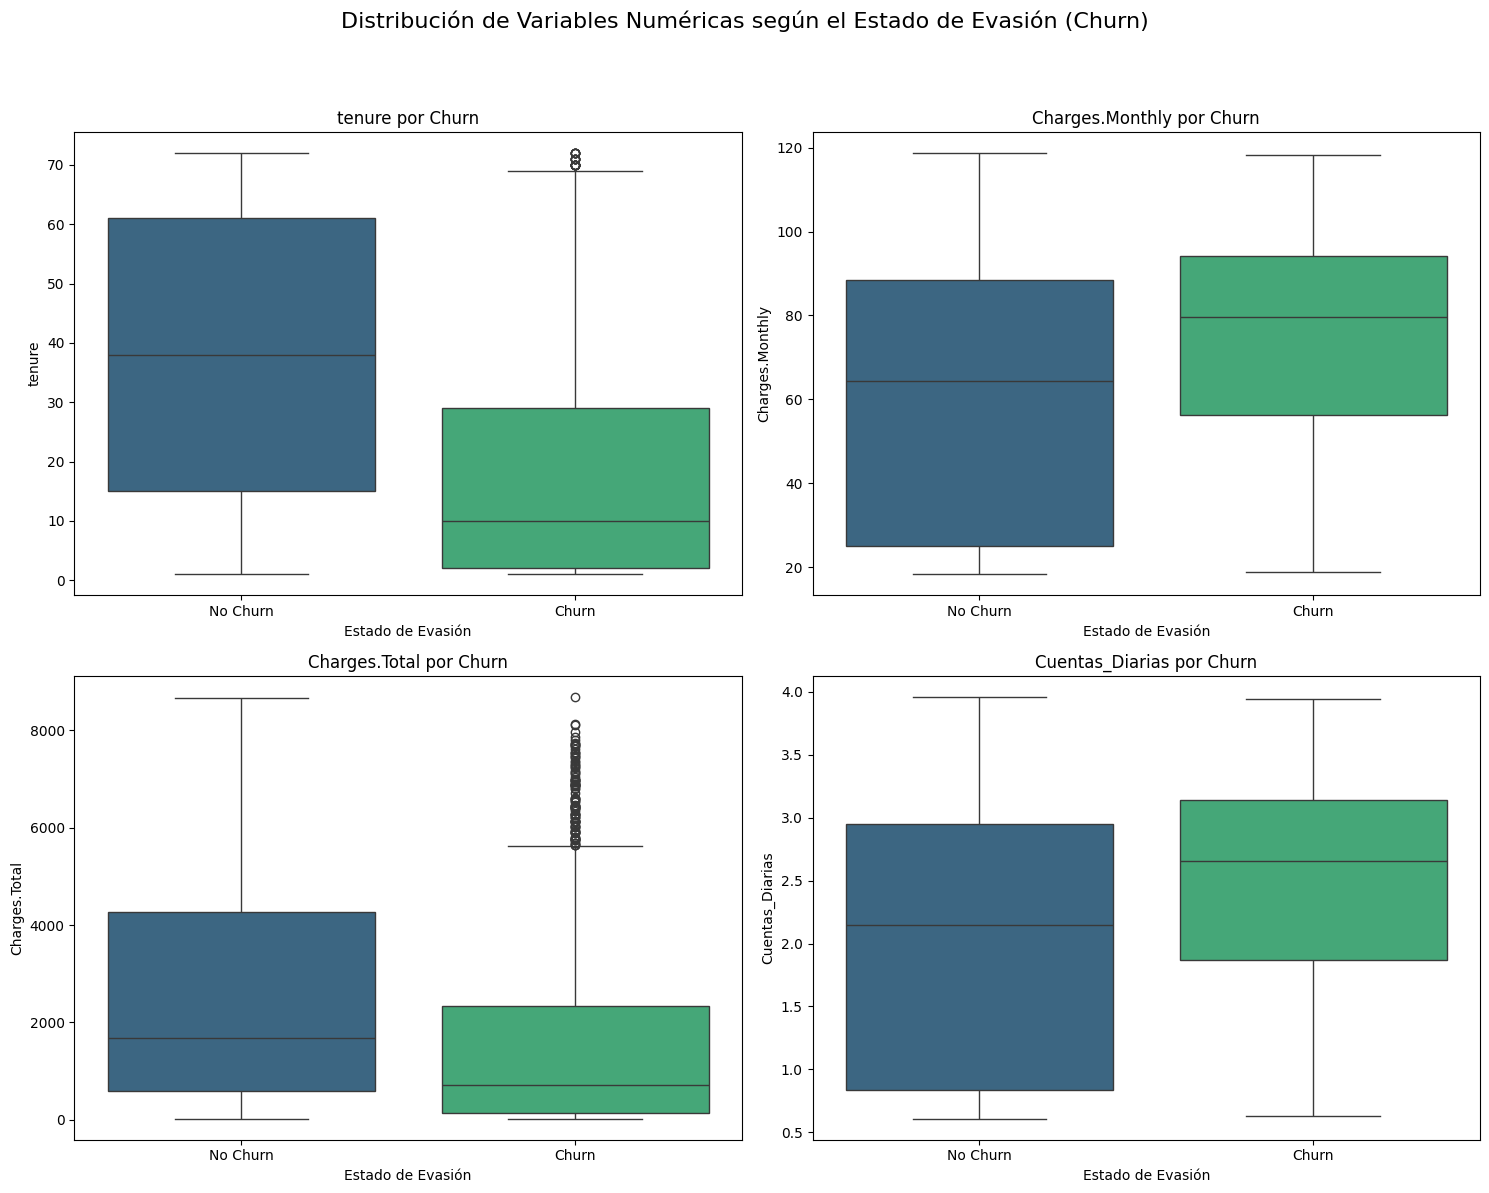


--- Estadísticas Descriptivas de Variables Numéricas por Churn ---
             tenure                                                     \
              count       mean        std  min   25%   50%   75%   max   
Churn_Label                                                              
Churn        1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0   
No Churn     5163.0  37.650010  24.076940  1.0  15.0  38.0  61.0  72.0   

            Charges.Monthly             ... Charges.Total           \
                      count       mean  ...           75%      max   
Churn_Label                             ...                          
Churn                1869.0  74.441332  ...      2331.300  8684.80   
No Churn             5163.0  61.307408  ...      4264.125  8672.45   

            Cuentas_Diarias                                                    \
                      count      mean       std       min       25%       50%   
Churn_Label                                     

In [46]:
print("--- Análisis de Evasión (Churn) por Variables Numéricas ---")

numeric_features = ['tenure', 'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias']

df_plot = df.copy()
df_plot['Churn_Label'] = df_plot['Churn'].map({0: 'No Churn', 1: 'Churn'})

plt.figure(figsize=(15, 12))
plt.suptitle('Distribución de Variables Numéricas según el Estado de Evasión (Churn)', y=1.02, fontsize=16)

for i, feature in enumerate(numeric_features):
    plt.subplot(2, 2, i + 1)

    sns.boxplot(x='Churn_Label', y=feature, data=df_plot, palette='viridis')
    plt.title(f'{feature} por Churn')
    plt.xlabel('Estado de Evasión')
    plt.ylabel(feature)

plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

print("\n--- Estadísticas Descriptivas de Variables Numéricas por Churn ---")
print(df_plot.groupby('Churn_Label')[numeric_features].describe())
print("\nVisualización y análisis de evasión por variables numéricas completado.")

--- Análisis de Correlación entre Variables ---

Correlación de 'Cuentas_Diarias' con Churn y otras variables numéricas:
Cuentas_Diarias    0.192858
Churn              1.000000
Charges.Monthly    0.192858
Charges.Total     -0.199484
tenure            -0.354049
Name: Churn, dtype: float64

Rangos de 'Num_Services': 0 - 9

Primeras 5 filas con la nueva columna 'Num_Services':
   Num_Services  Churn
0             4      0
1             3      0
2             3      1
3             6      1
4             4      1

Correlación entre 'Num_Services' y 'Churn': 0.0059


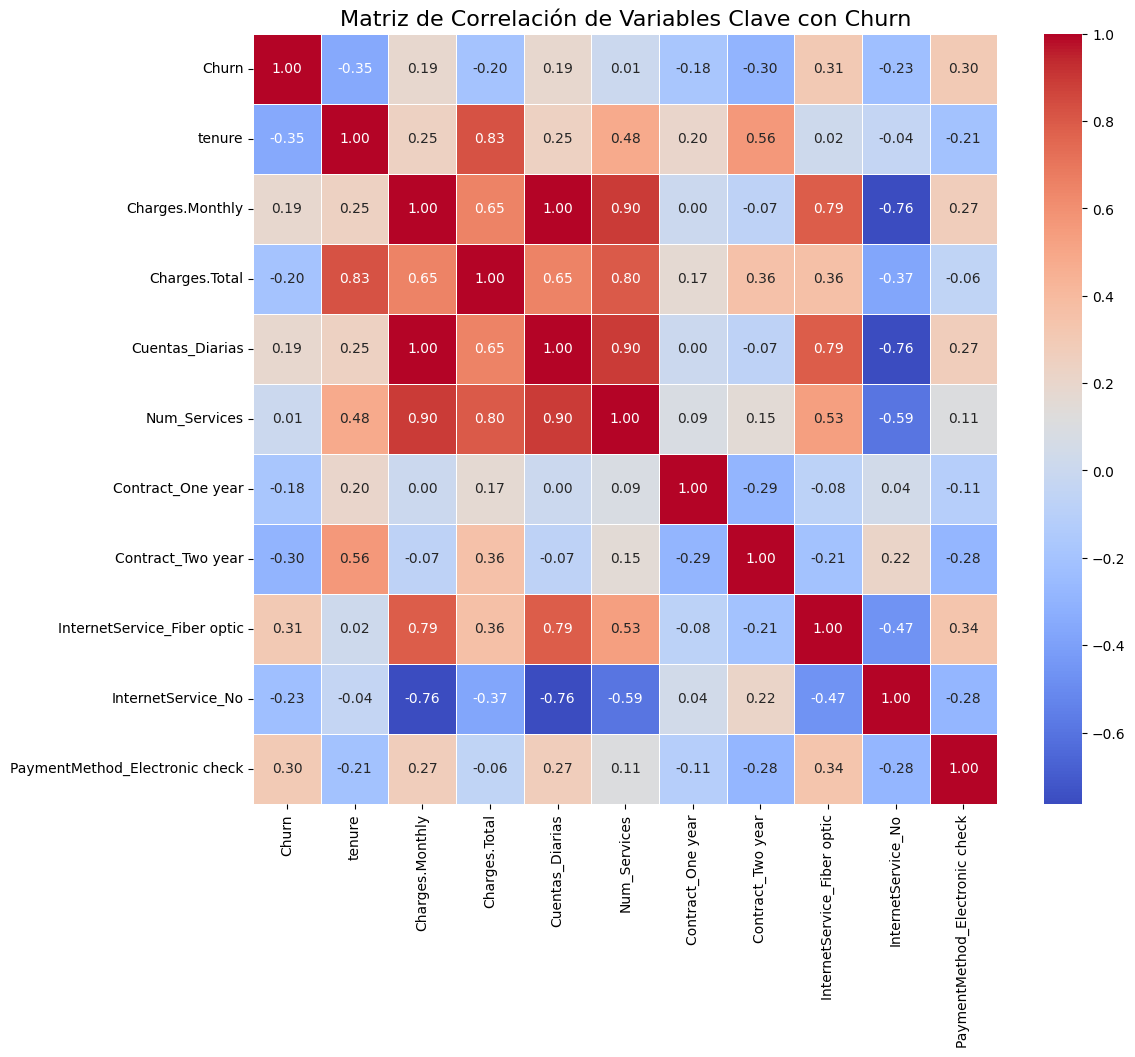


Análisis de correlación completado.


In [47]:
print("--- Análisis de Correlación entre Variables ---")
print("\nCorrelación de 'Cuentas_Diarias' con Churn y otras variables numéricas:")
print(df[['Cuentas_Diarias', 'Churn', 'Charges.Monthly', 'Charges.Total', 'tenure']].corr()['Churn'])

service_cols = [
    'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
    'InternetService_Fiber optic', 'InternetService_No'
]

service_features_for_counting = [
    'PhoneService',
    'MultipleLines',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies',
    'InternetService_Fiber optic'
]

df['Num_Services'] = df[service_features_for_counting].sum(axis=1)

print(f"\nRangos de 'Num_Services': {df['Num_Services'].min()} - {df['Num_Services'].max()}")
print("\nPrimeras 5 filas con la nueva columna 'Num_Services':")
print(df[['Num_Services', 'Churn']].head())
print(f"\nCorrelación entre 'Num_Services' y 'Churn': {df['Num_Services'].corr(df['Churn']):.4f}")
correlation_cols = ['Churn', 'tenure', 'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias', 'Num_Services']
correlation_cols.extend([
    'Contract_One year', 'Contract_Two year',
    'InternetService_Fiber optic', 'InternetService_No',
    'PaymentMethod_Electronic check'
])

corr_matrix = df[correlation_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación de Variables Clave con Churn', fontsize=16)
plt.show()

print("\nAnálisis de correlación completado.")

#📄Informe final

# Informe Final: Análisis de Evasión de Clientes (Churn) - Telecom X

**1. Introducción**

El presente informe tiene como objetivo principal analizar el problema de la evasión de clientes, comúnmente conocido como "Churn", en la empresa de telecomunicaciones Telecom X. La evasión de clientes representa una pérdida significativa de ingresos y una señal de insatisfacción en la base de clientes. A través de un análisis exploratorio de datos (EDA), buscamos identificar los factores clave y patrones que influyen en la decisión de un cliente de cancelar su servicio, con el fin de proporcionar información valiosa que permita a Telecom X desarrollar estrategias de retención más efectivas.

**2. Limpieza y Tratamiento de Datos**

El proceso de preparación de los datos fue fundamental para asegurar la calidad y la coherencia de la información para el análisis:

* **Carga de Datos:** Los datos fueron cargados a partir de un archivo JSON, creando un DataFrame de pandas con 7267 entradas iniciales.
* **Desanidado de Columnas:** Se identificaron y desanidaron las columnas `customer`, `phone`, `internet` y `account`, transformando sus diccionarios anidados en columnas planas para facilitar el acceso a la información individual de cada servicio y característica del cliente.
* **Verificación de Duplicados:** Se realizó una comprobación exhaustiva de filas completamente duplicadas y de IDs de cliente duplicados. No se encontraron filas completamente duplicadas ni IDs de cliente duplicados en el dataset, lo que asegura que cada registro representa un cliente único.
* **Tratamiento de Valores Nulos:** Se verificó la presencia de valores nulos utilizando `.isnull().sum()`. Directamente, no se detectaron valores nulos con esta función. Sin embargo, durante el procesamiento de `Charges.Total`, se identificaron 11 valores no numéricos (originalmente cadenas/espacios) que fueron convertidos a `NaN` y posteriormente gestionados, asegurando que esta columna fuera de tipo `float64`.
* **Corrección de Tipos de Datos y Conversión:**
    * La columna `Charges.Total` fue convertida a tipo `float64`.
    * Las columnas categóricas binarias (como `gender`, `Partner`, `Dependents`, `PhoneService`, etc.) fueron transformadas a valores binarios (0 y 1) para facilitar el análisis numérico.
    * Las columnas categóricas con múltiples categorías (como `InternetService`, `Contract`, `PaymentMethod`) fueron convertidas utilizando One-Hot Encoding, creando nuevas columnas binarias para cada categoría, lo que las hace aptas para modelos predictivos.
* **Creación de la Columna `Cuentas_Diarias`:** Se calculó y añadió una nueva columna `Cuentas_Diarias` dividiendo los `Charges.Monthly` por la cantidad de días en un mes, ofreciendo una granularidad diaria del gasto.

**3. Análisis Exploratorio de Datos (EDA)**

El EDA se centró en comprender la distribución de la variable `Churn` y sus relaciones con el resto de las características de los clientes.

* **Distribución de la Evasión (`Churn`):**
    * Se observó un desbalance de clases significativo: el **73.42% de los clientes permanecen** (`No Churn`), mientras que el **26.58% evaden** (`Churn`). Este desbalance es común en problemas de clasificación de Churn y será importante considerarlo en futuras etapas de modelado.

* **Recuento de Evasión por Variables Categóricas:**
    Se analizaron diversas variables categóricas para identificar patrones en la tasa de evasión:
    * **`gender` (Género):** No mostró una diferencia significativa en la tasa de evasión (26.96% para mujeres vs. 26.20% para hombres), sugiriendo que el género no es un factor determinante.
    * **`SeniorCitizen` (Tercera Edad):** Los clientes de la tercera edad (`Senior`) tienen una tasa de evasión notablemente más alta (41.68%) en comparación con los que no lo son (23.65%).
    * **`Partner` y `Dependents` (Pareja y Dependientes):** Los clientes sin pareja (32.98%) o sin dependientes (31.28%) muestran una mayor tasa de evasión que aquellos que sí los tienen (19.72% y 15.53% respectivamente).
    * **`OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport` (Servicios Adicionales):** La ausencia de estos servicios de seguridad y soporte se correlaciona con tasas de evasión significativamente más altas. Por ejemplo, la evasión sin `OnlineSecurity` es del 31.37% vs. 14.64% con el servicio.
    * **`StreamingTV` y `StreamingMovies`:** Curiosamente, los clientes con estos servicios de streaming tienen una tasa de evasión ligeramente más alta (aprox. 30%) que los que no los tienen (aprox. 24%).
    * **`PaperlessBilling` (Facturación Sin Papel):** Los clientes que utilizan facturación sin papel tienen una tasa de evasión considerablemente mayor (33.59%) que aquellos con facturación tradicional (16.38%).
    * **`InternetService` (Tipo de Servicio de Internet):** Los clientes con `Fibra Óptica` presentan la tasa de evasión más alta (41.89%), mientras que los de `DSL` tienen 19.00% y los que no tienen Internet, solo 7.43%.
    * **`Contract` (Tipo de Contrato):** Este es un predictor extremadamente fuerte. Los contratos `Month-to-month` tienen una tasa de evasión del **42.71%**, en contraste con el 11.28% para `One year` y solo el 2.85% para `Two year`.
    * **`PaymentMethod` (Método de Pago):** Los clientes que usan `Electronic check` como método de pago tienen la tasa de evasión más alta con un **45.29%**, muy superior a otros métodos como la transferencia bancaria automática (16.73%).

* **Recuento de Evasión por Variables Numéricas:**
    Se analizaron `tenure`, `Charges.Monthly`, `Charges.Total` y `Cuentas_Diarias`:
    * **`tenure` (Permanencia):** Los clientes que evaden tienen una permanencia significativamente menor (mediana de 10 meses) en comparación con los que no evaden (mediana de 38 meses). Una baja permanencia es un fuerte indicador de evasión.
    * **`Charges.Monthly` (Cargos Mensuales):** Los clientes que evaden tienden a tener cargos mensuales más altos (mediana de $74.44) que los que no evaden (mediana de $61.31).
    * **`Charges.Total` (Cargos Totales):** Los clientes que evaden tienen cargos totales considerablemente más bajos (mediana de $401.45) que los que no evaden (mediana de $1397.48), lo cual es coherente con su menor permanencia.
    * **`Cuentas_Diarias`:** Sigue el mismo patrón que `Charges.Monthly`, confirmando que cargos diarios más altos están asociados con mayor evasión.

* **Análisis de Correlación entre Variables:**
    * **`tenure` vs. `Churn`:** Correlación negativa fuerte (-0.35), indicando que mayor permanencia se asocia con menor evasión.
    * **`Charges.Monthly` / `Cuentas_Diarias` vs. `Churn`:** Correlación positiva débil (0.19), sugiriendo que cargos mensuales más altos se asocian con mayor evasión.
    * **`Charges.Total` vs. `Churn`:** Correlación negativa débil (-0.19), indicando que mayores cargos totales (debido a mayor permanencia) se asocian con menor evasión.
    * **`Num_Services` vs. `Churn`:** La correlación es casi nula (0.01), lo que sugiere que el simple número de servicios no es un fuerte predictor de evasión; la *calidad* o *tipo* de servicio es más relevante.
    * **Correlaciones notables con `Churn` en el Heatmap:** Fuertes correlaciones negativas con `Contract_Two year` (-0.30), `OnlineSecurity` (-0.28), `TechSupport` (-0.28). Fuertes correlaciones positivas con `PaymentMethod_Electronic check` (0.30) e `InternetService_Fiber optic` (0.31).

**4. Conclusiones e Insights**

El análisis exploratorio de datos ha revelado varios insights cruciales sobre la evasión de clientes en Telecom X:

* **El Compromiso es Clave:** La duración del contrato es el factor más influyente. Los clientes con contratos `mes a mes` son, con mucho, los más propensos a evadir. Esto indica que la falta de un compromiso a largo plazo facilita la salida.
* **Problemas con el Cheque Electrónico:** El método de pago con `cheque electrónico` está fuertemente asociado con la evasión. Esto podría ser un indicio de ineficiencias en el proceso de pago o de un segmento de clientes menos satisfecho.
* **Fibra Óptica: ¿Una Promesa Incumplida?** Los clientes de `Fibra Óptica` evaden a una tasa sorprendente, casi el doble que los de `DSL`. Esto podría deberse a expectativas no cumplidas, problemas de estabilidad del servicio, o una mayor sensibilidad al precio por parte de este segmento de clientes.
* **La Experiencia Inicial es Fundamental:** La mayoría de las evasiones ocurren en los primeros meses de servicio (baja `tenure`). Esto subraya la importancia de una excelente experiencia de incorporación y un soporte proactivo durante este período crítico.
* **Valor de los Servicios de Seguridad y Soporte:** Servicios como `OnlineSecurity` y `TechSupport` actúan como "anclas", reduciendo significativamente la probabilidad de evasión. Estos servicios agregan valor y confianza al cliente.
* **Segmentos de Riesgo:** Los `Senior Citizens`, clientes sin `Partner` o `Dependents`, y aquellos con `PaperlessBilling` muestran una mayor tendencia a evadir.
* **Precio y Percepción de Valor:** Los clientes con `cargos mensuales más altos` son más propensos a evadir, lo que sugiere que la percepción del valor por el dinero pagado es un factor importante.

**5. Recomendaciones Estratégicas**

Basado en estos hallazgos, se proponen las siguientes recomendaciones para Telecom X:

* **Estrategias de Retención de Contratos a Largo Plazo:**
    * Ofrecer incentivos atractivos (descuentos, beneficios adicionales, upgrades de servicio) para que los clientes opten por contratos de 12 o 24 meses.
    * Implementar programas de fidelización especiales para clientes que renuevan contratos a largo plazo.

* **Optimización del Proceso de Pago con Cheque Electrónico:**
    * Investigar las causas de la alta evasión asociada a este método. ¿Es un problema de UX, de comunicación, o de confiabilidad?
    * Promover activamente métodos de pago automáticos (transferencia bancaria, tarjeta de crédito) que muestran tasas de evasión mucho más bajas, ofreciendo quizás pequeños incentivos por su uso.

* **Mejora de la Experiencia de Fibra Óptica:**
    * Realizar encuestas de satisfacción específicas para clientes de fibra óptica y monitorear proactivamente la calidad del servicio.
    * Asegurar que el soporte técnico y la resolución de problemas para este segmento sean prioritarios y eficientes.
    * Evaluar si las tarifas de fibra óptica están alineadas con la percepción de valor del cliente en comparación con la competencia.

* **Programas de Incorporación y Retención Temprana:**
    * Desarrollar un programa de "bienvenida" robusto para los primeros 3-6 meses de servicio, con seguimiento proactivo para identificar y resolver posibles problemas.
    * Ofrecer incentivos adicionales o servicios complementarios durante este período para "enganchar" al cliente.

* **Fomento de Servicios de Valor Añadido:**
    * Promocionar activamente los beneficios de `OnlineSecurity` y `TechSupport` en los paquetes de servicios, destacando cómo estos mejoran la experiencia del cliente y su seguridad.
    * Considerar ofrecer pruebas gratuitas o descuentos iniciales en estos servicios para aumentar su adopción.

* **Segmentación y Estrategias Dirigidas:**
    * Diseñar campañas de retención específicas para segmentos de alto riesgo como `Senior Citizens`, clientes individuales, y usuarios de `PaperlessBilling`, abordando sus necesidades y preocupaciones particulares.
    * Revisar los paquetes de precios para clientes con altos cargos mensuales, asegurando que perciban un valor justo por el servicio recibido.